# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [ ]:
# prompt: df DataFrame 사용:

df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
# prompt: df DataFrame 사용: 이상치

import pandas as pd

# Find the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find

<ipython-input-93-6f1bb8763640>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-93-6f1bb8763640>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


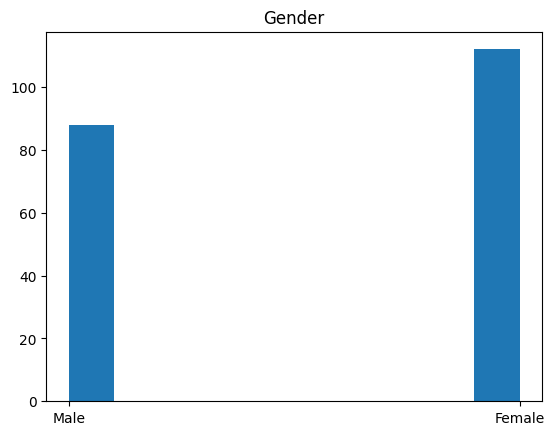

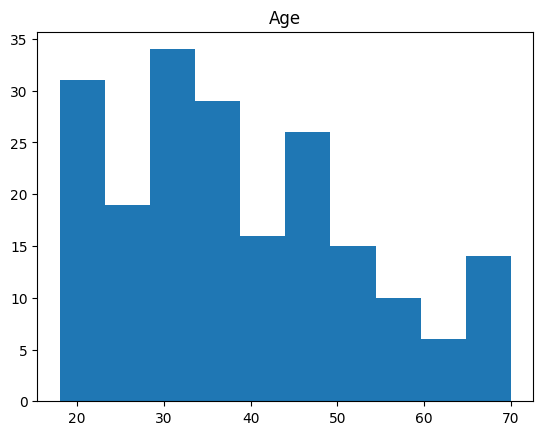

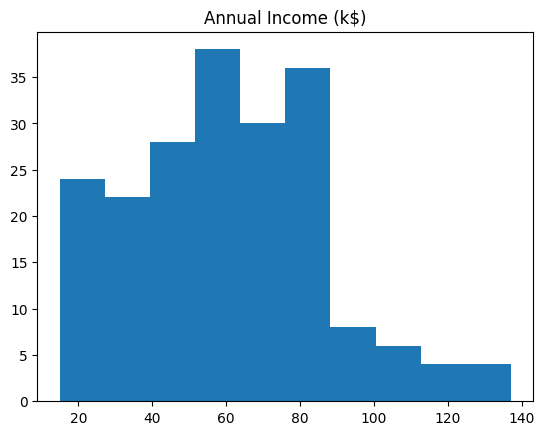

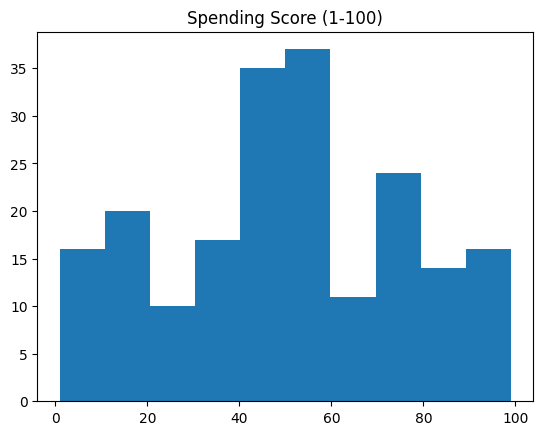

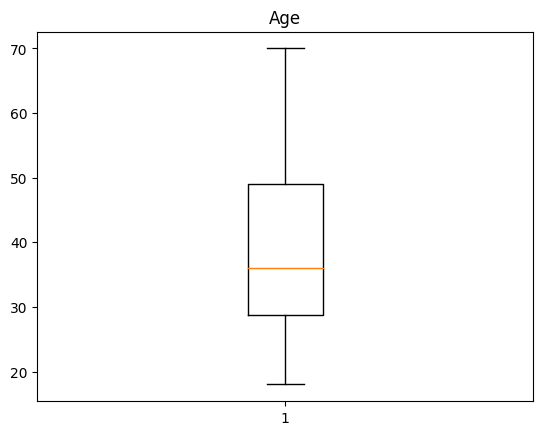

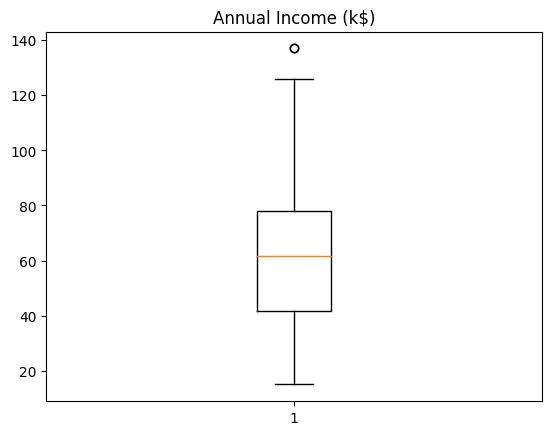

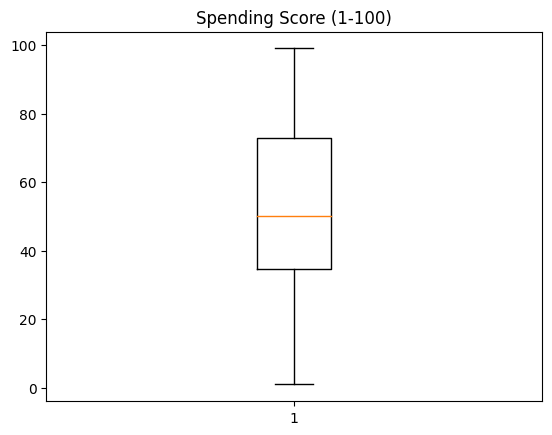

In [ ]:
# prompt: df DataFrame 사용: Preprocssing / EDA

# Check for missing values
df.isnull().sum()

# Check for data types
df.dtypes

# Calculate descriptive statistics
df.describe()

# Visualize the distribution of each column
import matplotlib.pyplot as plt
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

# Check for outliers
for col in df.select_dtypes(include=['number']):
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

# Check for

In [ ]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

### Annual Income 이상치 처리

In [ ]:
df = df[df['Annual Income (k$)'] != 137]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


## 2. Clustering

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Gender 열을 숫자형으로 변환 (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# KMeans 모델을 생성하고 클러스터링을 수행
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# 클러스터링 결과를 데이터프레임에 추가
df['Cluster'] = kmeans.labels_

print(df)


            Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
CustomerID                                                                  
1                0   19                  15                      39        1
2                0   21                  15                      81        3
3                1   20                  16                       6        1
4                1   23                  16                      77        3
5                1   31                  17                      40        1
...            ...  ...                 ...                     ...      ...
194              1   38                 113                      91        0
195              1   47                 120                      16        2
196              1   35                 120                      79        0
197              1   45                 126                      28        2
198              0   32                 126                      74        0

<ipython-input-99-a17a5026fb0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


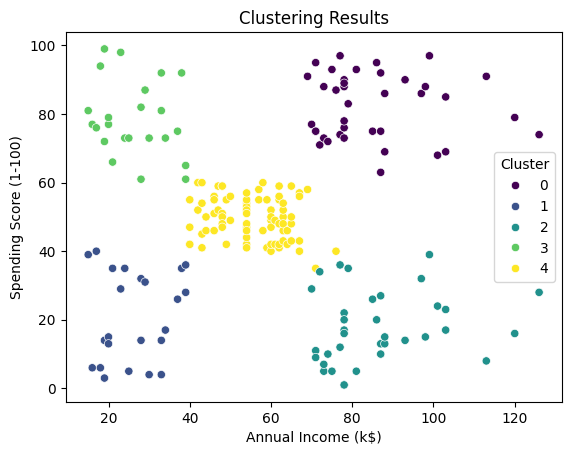

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## 3. Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

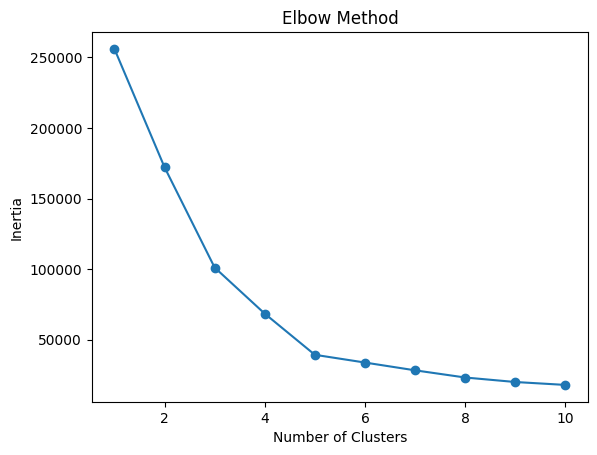

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터링에 사용할 특성 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 클러스터 수 범위 설정
cluster_range = range(1, 11)
inertia = []

# 각 클러스터 수에 따른 이너셔 계산
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 통한 최적 클러스터 수 찾기
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

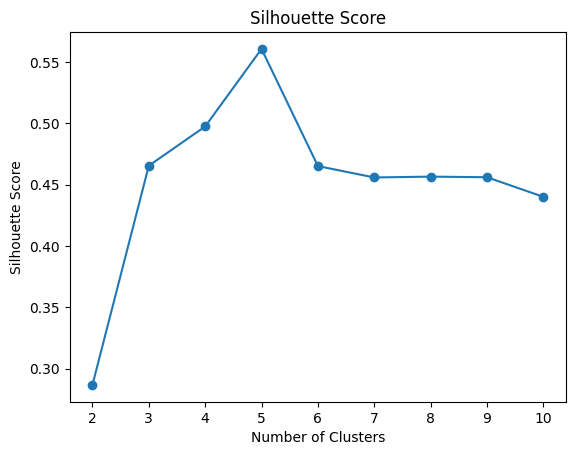

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터링에 사용할 특성 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 클러스터 수 범위 설정
cluster_range = range(2, 11)
silhouette_scores = []

# 각 클러스터 수에 따른 실루엣 점수 계산
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수를 시각화
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
